## Ternary Cellular Automata
Example for a three-state and one dimension cellular automata.
Every cell interacts with its current state and two adjacent neighbours.
For this example, we use ndautomata as main library to generate the Automaton class, together with matplotlib to represent the automaton evolution.

In [1]:
import ndautomata as ca
import matplotlib.pyplot as plt
from ndautomata import initializers, neighbours

Using the abstract class `ndautomata.BaseAutomaton` we generate the 1D `Automaton` class defining a regular array of 1 dimension index. Radius is set to 1 to limit neighbours to the direct contact. The number of possible states is set to 3 to obtain ternary patterns. 

In [2]:
class Automaton(ca.BaseAutomaton):
    neighbours = neighbours.regular(ndim=1, r=1)
    states = 3

In this example, we will generate a Generic rule for our cellular automata evolution. To do so, as first step, it is required to generate a connections array space for a rule function with 3 arguments, one for the cell state and two each direct neighbour:

$$a{_{i}^{t+1}} = \phi \begin{bmatrix} a{_{i-1}^{t}}, a{_{i}^{t}}, a{_{i+1}^{t}} \end{bmatrix}$$

As the space of possible rules is too large to represent as a string ($3^{27}$), we can generate a random base rule and set some of the properties.

In [3]:
connections = [Automaton.states] * Automaton.neighbours.size
rule = initializers.random(states=Automaton.states, size=connections)

Once the rule is set, an automata instance can be generated. To do so, we use again the `initializers` module to generate the initial conditions. In this example, we start with a a unique active state *1* located at the center of the initial conditions. All the rest of cells start with the value *0*.

In [4]:
ic = initializers.center(states=Automaton.states, size=[200])
automaton = Automaton(ic, rule)

Finally, with the help of `matplotlib` we can generate the rule space-time diagram. As on the elementary diagram, in this plot, each row of pixels shows the cells of the automaton at a single point in time, with time increasing downwards.

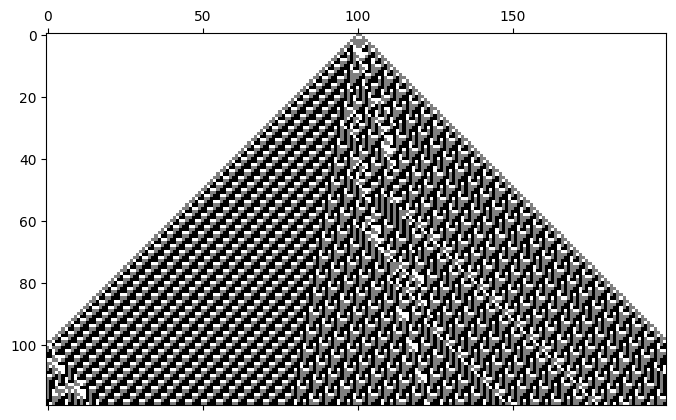

In [5]:
plt.rcParams["image.cmap"] = "binary"
plt.matshow([next(automaton) for _ in range(120)])
plt.show()

Total runtime is around `0.2s` on a `Intel(R) Core(TM) i5-8365U CPU @ 1.60GHz`.